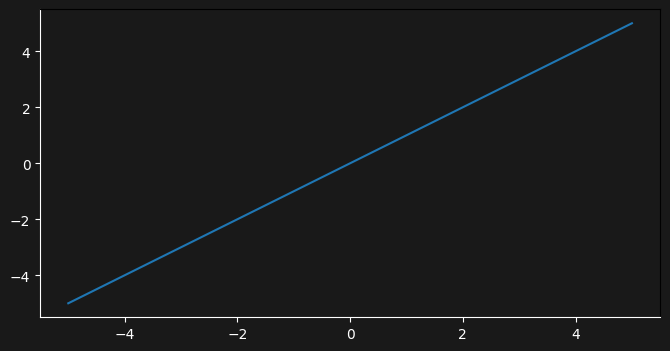

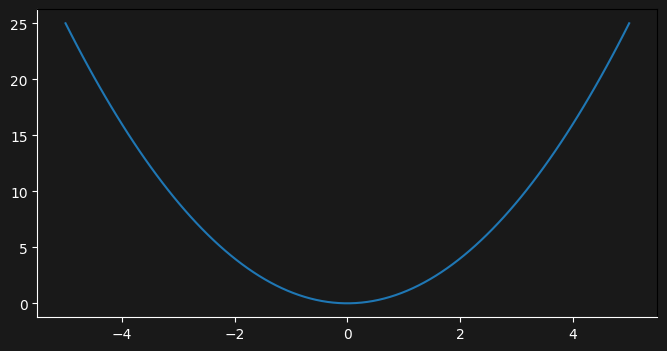

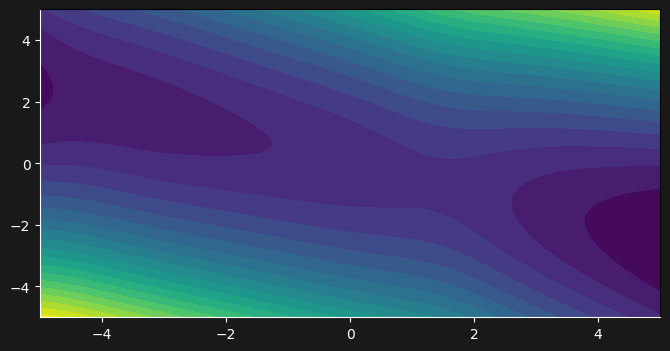

In [1]:
import matplotlib.pyplot as plt
import numpy as np


BACKGROUND_COLOR = "#191919"
SIZE = 100


def identity(x):
    return x

def square(x):
    return x**2

def complicated(x1, x2):
    mat_x1 = np.repeat(x1, SIZE).reshape(SIZE, SIZE)
    mat_x2 = np.tile(x2, SIZE).reshape(SIZE, SIZE)
    return mat_x1*mat_x2 + (mat_x1)**2 + np.exp(np.sin(mat_x2))



def plot_function(x, fun, out_path, *args):
    fig, ax = plt.subplots(figsize=(8, 4))
    fig.patch.set_facecolor(BACKGROUND_COLOR)

    ax.set_facecolor(BACKGROUND_COLOR)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')

    if args:
        ax.contourf(x, args[0], complicated(x, args[0]), 20, cmap="viridis")
    else:
        ax.plot(x, fun(x))

    plt.savefig(out_path)

x1 = np.linspace(-5, 5, SIZE)
x2 = np.linspace(-5, 5, SIZE)

plot_function(x1, identity, "images/identity.png")
plot_function(x1, square, "images/square.png")
plot_function(x1, complicated, "images/complicated.png", x2)

In [49]:
import matplotlib.pyplot as plt
import numpy as np


BACKGROUND_COLOR = "#191919"
SIZE = 100


def identity(x):
    return x

def identity_derivative(x):
    return np.ones_like(x)

def square(x):
    return x**2

def square_derivative(x):
    return 2*x

def derivative_plot(x, function, dfunction, label, out_path):
    fig, ax = plt.subplots(figsize=(8, 4))
    fig.patch.set_facecolor(BACKGROUND_COLOR)

    ax.set_facecolor(BACKGROUND_COLOR)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')

    x_range = np.linspace(-6, 6, SIZE)
    

    fx = function(x)
    fpx = dfunction(x)
    
    ax.plot(x_range, function(x_range), label=label, color='cyan')
    
    # Arrow with the inclination of the derivative
    arrow_dx = 1
    arrow_dy = fpx * arrow_dx
    ax.arrow(x, fx, arrow_dx, arrow_dy, head_width=0.3, head_length=0.3, 
                fc='yellow', ec='yellow', linestyle='dotted')
    
    # Annotation at top middle with LaTeX notation for partial derivative
    ax.text(0, max(function(x_range)) * 0.9, f"$\\frac{{d}}{{dx}}f({x:.3f}) = {fpx:.3f}$", 
                color='white', fontsize=12, ha='center')
    
    # Scatter point
    ax.scatter([x], [fx], color='yellow', zorder=3)
    
    legend = ax.legend(loc='upper left', fontsize=10, facecolor=BACKGROUND_COLOR, framealpha=0.5)
    for text in legend.get_texts():
        text.set_color("white")

    plt.tight_layout()
    plt.savefig(f"images/{out_path}")
    plt.close()

IMAGES = 100
x_range = np.linspace(-5, 5, IMAGES + 1)
for i, x in enumerate(x_range):
    derivative_plot(x, identity, identity_derivative, "f(x) = x", f"linear_animation/{str(i).zfill(4)}.png")
    derivative_plot(x, square, square_derivative, "f(x) = x²", f"square_animation/{str(i).zfill(4)}.png")

# ffmpeg -framerate 24 -i 'assets/images/linear_animation/%04d.png' -c:v libx264 -pix_fmt yuv420p assets/videos/linear_derivative.mp4 -y
# ffmpeg -framerate 24 -i 'assets/images/square_animation/%04d.png' -c:v libx264 -pix_fmt yuv420p assets/videos/square_derivative.mp4 -y